### Importing Libraries and data set

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [4]:
%matplotlib inline

In [5]:
path = r"C:\Users\dioog\02. Bloomberg Analysis"

In [6]:
df = pd.read_csv(os.path.join(path, "02_Data", "Prepared data", "df_Vs3.csv"))

In [7]:
df_clean2 = pd.read_csv(os.path.join(path, "02_Data", "Prepared data", "df_Vs3_clean2_exe6-4.csv"))

In [8]:
df.shape

(4937, 32)

In [10]:
df_clean2.shape

(4779, 33)

### Data manipulation and reprocessing 


In [11]:
df_clean2.columns 

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Ticker', 'Short Name',
       'Market Cap', 'Rank(Current Market Cap)', 'Sector', 'Prim Exch Nm',
       'Country', 'Cntry of Incorp', 'Best Analyst Rating', '52Wk High',
       '52Wk Low', '52Wk Low Dt', '52Wk High Dt', '1Y Tot Ret (%)',
       '02/12/2019', '01/01/2020', '03/02/2020', '02/03/2020', '01/04/2020',
       '01/05/2020', '01/06/2020', '01/07/2020', '03/08/2020', '01/09/2020',
       '01/10/2020', '02/11/2020', 'ratio_yearvar_meanprice',
       'performance category', 'Value category', 'performance category_2'],
      dtype='object')

In [35]:
# removing categorical and prices columns 

df_num = df_clean2[['Market Cap', '1Y Tot Ret (%)', 'ratio_yearvar_meanprice']]

In [36]:
df_num.describe()

,Market Cap,1Y Tot Ret (%),ratio_yearvar_meanprice
count,4.779000e+03,4779.000000,4779.000000
mean,1.897072e+10,26.979590,0.761016
std,6.108302e+10,94.799095,0.408997
min,2.751337e+09,-77.790000,0.000000
25%,4.083476e+09,-7.780000,0.518315
50%,6.813822e+09,8.670000,0.682705
75%,1.509442e+10,35.695000,0.917707
max,2.045317e+12,2547.540000,9.289960


In [37]:
# Multiplying "ratio_yearvar_meanprice" by 100 to reduce the difference between your variables’ scales.

df_num["ratio_yearvar_meanprice_100"] = 100 * df_num["ratio_yearvar_meanprice"] 

<ipython-input-37-76ecc9ee9a78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["ratio_yearvar_meanprice_100"] = 100 * df_num["ratio_yearvar_meanprice"]


In [39]:
df_num["ratio_yearvar_meanprice_100"].describe()

count    4779.000000
mean       76.101582
std        40.899678
min         0.000000
25%        51.831463
50%        68.270521
75%        91.770694
max       928.996010
Name: ratio_yearvar_meanprice_100, dtype: float64

In [51]:
# standardizing "Market Cap" by substituting original value by its 5th root.

df_num["Market Cap_5root"] = df_num["Market Cap"] ** (1.0 / 5) 

<ipython-input-51-1125bb0c0df2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Market Cap_5root"] = df_num["Market Cap"] ** (1.0 / 5)


In [53]:
df_num["Market Cap_5root"].describe()

count    4779.000000
mean       99.832696
std        22.735953
min        77.251829
25%        83.599948
50%        92.614323
75%       108.583360
max       289.835860
Name: Market Cap_5root, dtype: float64

In [54]:
# removing "ratio_yearvar_meanprice" and "Market Cap" columns 

df_num2 = df_num[['1Y Tot Ret (%)', 'ratio_yearvar_meanprice_100', 'Market Cap_5root']]

In [56]:
df_num2.describe()

,1Y Tot Ret (%),ratio_yearvar_meanprice_100,Market Cap_5root
count,4779.000000,4779.000000,4779.000000
mean,26.979590,76.101582,99.832696
std,94.799095,40.899678,22.735953
min,-77.790000,0.000000,77.251829
25%,-7.780000,51.831463,83.599948
50%,8.670000,68.270521,92.614323
75%,35.695000,91.770694,108.583360
max,2547.540000,928.996010,289.835860


### Applying the elbow technique

In [57]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [58]:
score = [kmeans[i].fit(df_num2).score(df_num2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-53401678.75769567,
 -32187186.067436945,
 -18237832.68039223,
 -13123313.665808387,
 -10393134.60550252,
 -8634531.576771293,
 -7443294.179042715,
 -6393649.52164888,
 -5791039.484683682]

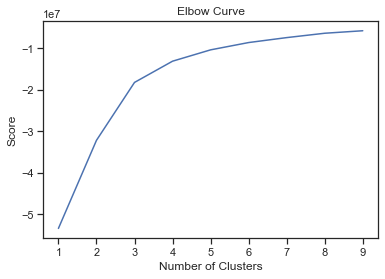

In [59]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Comment:

##### Based on the chart, It appears that the optimal number of clusters is four.

#####  After that the curve begins to flatten out.

### Running the k-means algorithm

In [65]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [66]:
# Fitting the k-means object to the data.

kmeans.fit(df_num2)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

### Attaching a new column to dataframe with the resulting clusters 

In [67]:
df_num2['clusters'] = kmeans.fit_predict(df_num2)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-67-3d6b0500296c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num2['clusters'] = kmeans.fit_predict(df_num2)


In [68]:
df_num2.head()

,1Y Tot Ret (%),ratio_yearvar_meanprice_100,Market Cap_5root,clusters
0,79.75,95.673832,289.835860,0
1,43.23,54.061772,277.392054,1
2,77.83,77.131536,274.938756,0
3,33.98,56.891065,260.629630,1
4,36.94,74.137817,239.897271,1


In [69]:
df_num2['clusters'].value_counts()

1    4115
0     611
3      49
2       4
Name: clusters, dtype: int64

In [70]:
df_num2.columns

Index(['1Y Tot Ret (%)', 'ratio_yearvar_meanprice_100', 'Market Cap_5root',
       'clusters'],
      dtype='object')

### Creating visualizations using your clustered data. 

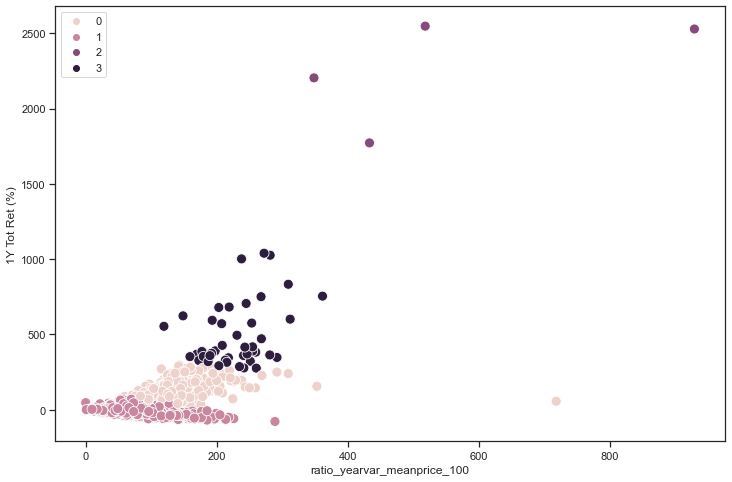

In [71]:
# Plotting the clusters for the 'ratio_yearvar_meanprice_100' and '1Y Tot Ret (%)' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num2['ratio_yearvar_meanprice_100'], y=df_num2['1Y Tot Ret (%)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ratio_yearvar_meanprice_100') # Label x-axis.
plt.ylabel('1Y Tot Ret (%)') # Label y-axis.
plt.show()

### Comment:

##### The clusters make sense as they group the companies according to its yearly performance.

##### The clusters mark the distinction between winners and losers in the context of the pandemic. 

##### It is questionable if cluster 2 makes sense -  it only contains 4 companies. 

##### But, I also tried it with 3 clusters and these four companies also had a cluster of their own. 

##### In the end I decided that four clusters was more informative. Still, it is possible these 4 ouliers create bias.

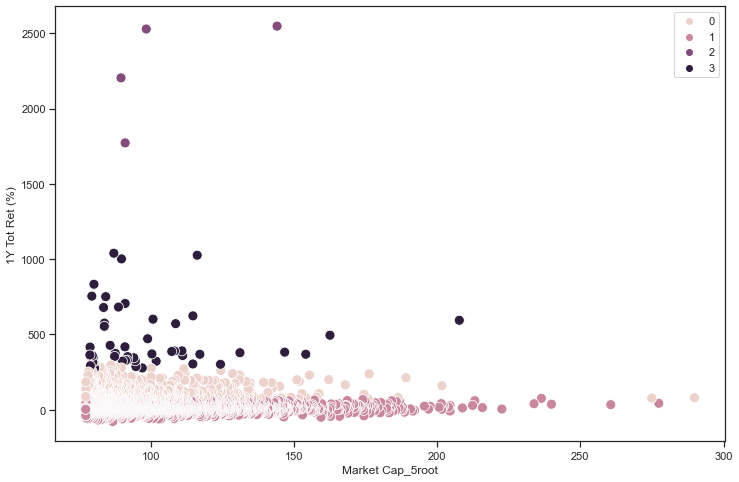

In [72]:
# Plotting the clusters for the 'ratio_yearvar_meanprice_100' and 'Market Cap_5root' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num2['Market Cap_5root'], y=df_num2['1Y Tot Ret (%)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Market Cap_5root') # Label x-axis.
plt.ylabel('1Y Tot Ret (%)') # Label y-axis.
plt.show()

### Comment:

##### The clusters make sense as they group the companies according to their total value and yearly performance.

##### It shows performance was not determined by total value. The companies that outperformed were not necessarily the most valuable.  

##### At the same time, among the companies that performed moderately, it is possible to find the entire spectrum of the data set in term of market capitalization.

### Calculating e the descriptive statistics for the clusters using the groupby() function 

In [76]:
df_num2.groupby('clusters').agg({'ratio_yearvar_meanprice_100':['mean', 'median'], 
                         'Market Cap_5root':['mean', 'median'], 
                         '1Y Tot Ret (%)':['mean', 'median']})

ratio_yearvar_meanprice_100             Market Cap_5root             \
                                mean      median             mean     median   
clusters                                                                       
0                         124.382491  116.330892        98.477260  92.037833   
1                          66.705354   63.285024       100.020867  92.769913   
2                         557.160013  475.621822       105.775187  94.717006   
3                         223.889489  217.835608       100.446545  91.772345   

         1Y Tot Ret (%)           
                   mean   median  
clusters                          
0            117.422390   101.59  
1              6.078875     4.04  
2           2263.057500  2366.27  
3            471.909796   379.18

### Comment:

##### In terms of yearly performance, most companies in cluster 1 performed moderately. 

##### All the companies in clusters 0, 3 and 4, clearly won from the pandemic situation.

##### But between them there are staggering performance differences. 

##### Cluster 2 comprises four companies that registered an average appreciation of 2263%!

##### In terms of market capitalization, the difference between the clusters' medians is relatively small.

##### Possibly suggesting this variable is not determinant for 1Y Tot Ret (%).


### Proposition of future steps of an analytics pipeline:

##### Explore the differences in yearly performance using categorical variables

##### Explore time-series with the prices contained in dataset